In [109]:
import numpy as np
import pandas as pd



import matplotlib.pyplot as plt  #plotting
import seaborn as sns


from collections import Counter


from scipy import stats        #statistics
import statsmodels.api as sm

#machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

%matplotlib inline
sns.set()

In [2]:
#load the data
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(16719, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
df.describe(include=[np.number], percentiles=[0.01, .05, .1, .25, .5, .75]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,max
Year_of_Release,16450.0,2006.487356,5.878995,1980.00,1987.00,1996.00,1999.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16719.0,0.263330,0.813514,0.00,0.00,0.00,0.00,0.00,0.08,0.24,41.36
EU_Sales,16719.0,0.145025,0.503283,0.00,0.00,0.00,0.00,0.00,0.02,0.11,28.96
JP_Sales,16719.0,0.077602,0.308818,0.00,0.00,0.00,0.00,0.00,0.00,0.04,10.22
Other_Sales,16719.0,0.047332,0.186710,0.00,0.00,0.00,0.00,0.00,0.01,0.03,10.57
Global_Sales,16719.0,0.533543,1.547935,0.01,0.01,0.02,0.02,0.06,0.17,0.47,82.53
Critic_Score,8137.0,68.967679,13.938165,13.00,31.00,43.00,50.00,60.00,71.00,79.00,98.00
Critic_Count,8137.0,26.360821,18.980495,3.00,4.00,5.00,6.00,12.00,21.00,36.00,113.00
User_Count,7590.0,162.229908,561.282326,4.00,4.00,5.00,6.00,10.00,24.00,81.00,10665.00


In [7]:
df.describe(include=[np.object, pd.Categorical]).T  

,count,unique,top,freq
Name,16717,11562,Need for Speed: Most Wanted,12
Platform,16719,31,PS2,2161
Genre,16717,12,Action,3370
Publisher,16665,581,Electronic Arts,1356
User_Score,10015,96,tbd,2425
Developer,10096,1696,Ubisoft,204
Rating,9950,8,E,3991


In [8]:
#For some rason Critic_Score is a float64 and User_Score is an object

df['User_Score'] = df['User_Score'].replace('tbd',np.NaN)
df['User_Score'] = df['User_Score'].astype("float64")

#Also, Critic_Score goes from 0 to 100 while User_Score goes from 0 to 10

df['User_Score'] = df['User_Score'] * 10

In [9]:
def cnt(data, pal, lbl, ttle):
    ax=sns.countplot(y=data, palette=pal)
    ax.set(ylabel=lbl, xlabel='', title=ttle)
    ax.figure.set_size_inches(20, 8)
    plt.show()

In [10]:
#We have somo rows that are missing the year of release
df_2 = df[df.Year_of_Release.notnull()]
#Remove the rows with missing year of release
df_2['Year_of_Release'] = df_2['Year_of_Release'].astype(np.int64)

#Change the datatype of the column so the plot looks nicer
df_year = df_2.groupby(['Year_of_Release']).sum()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


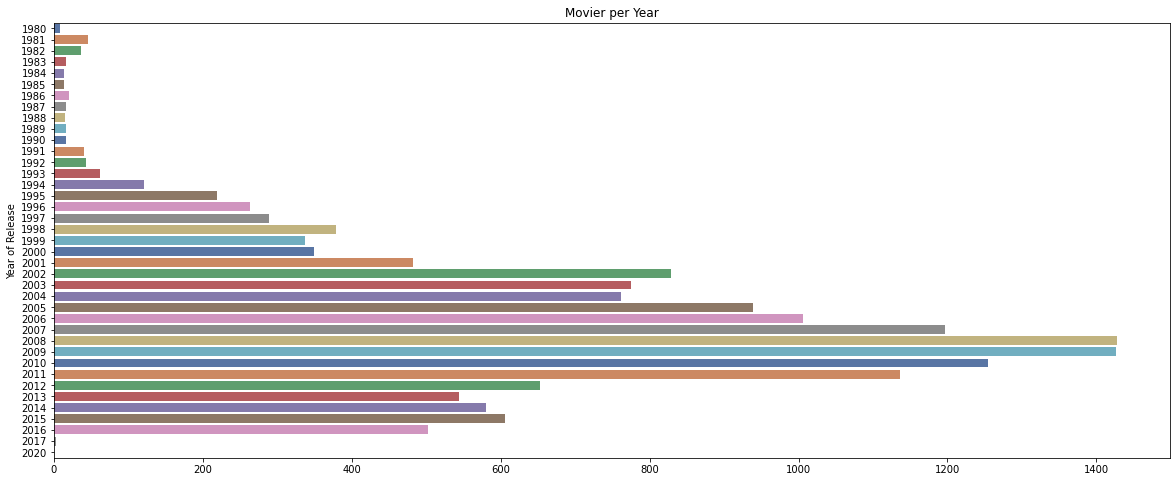

In [11]:
cnt(df_2['Year_of_Release'], 
        'deep',
        'Year of Release',
        'Movier per Year')

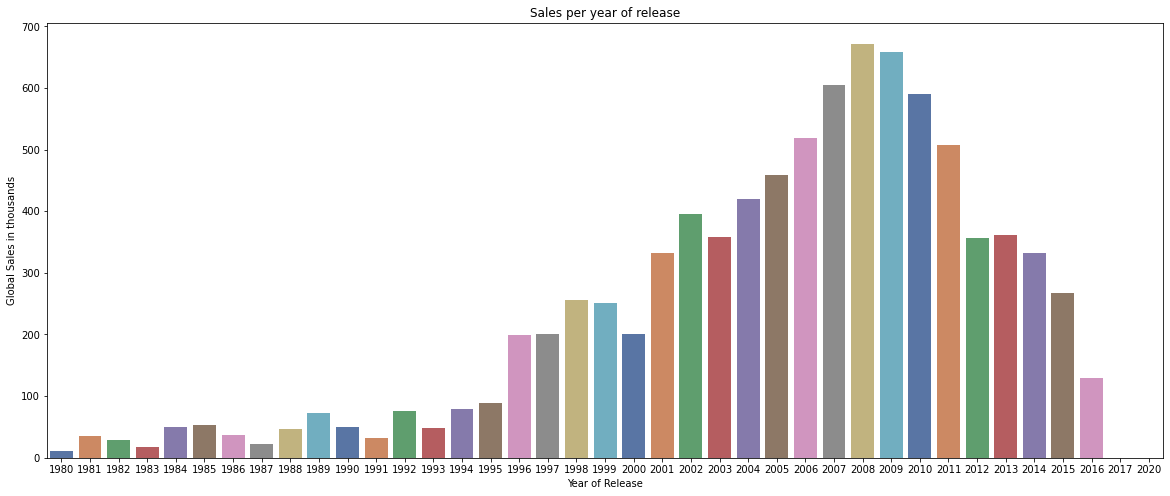

In [12]:
ax = sns.barplot(x=df_year.index,
                    y=df_year['Global_Sales'],
                    palette='deep')
ax.set(xlabel="Year of Release",
         ylabel="Global Sales in thousands",
         title="Sales per year of release")
ax.figure.set_size_inches(20, 8)
plt.show()

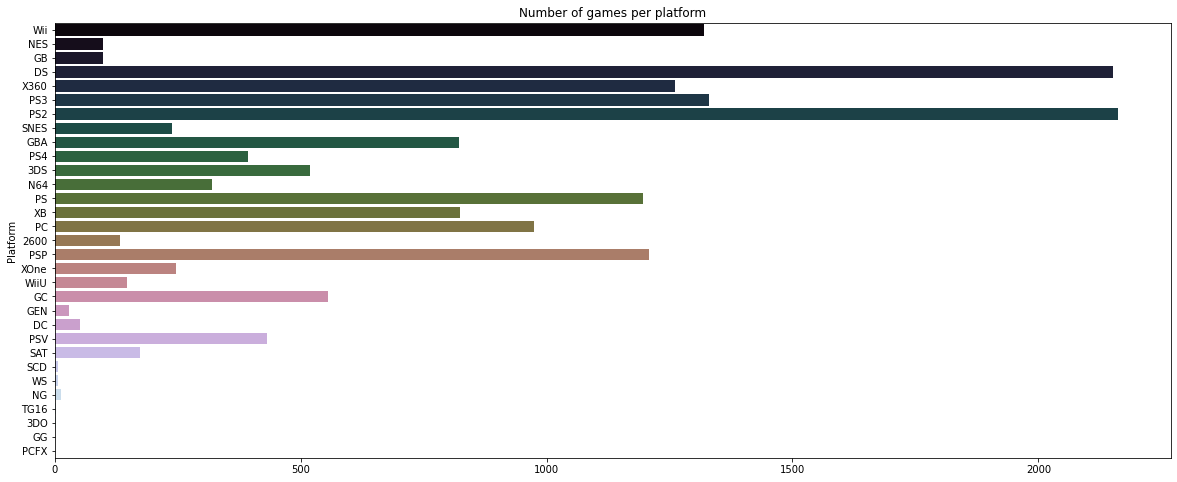

In [13]:
cnt(df['Platform'], 
    'cubehelix', 
    'Platform',
    'Number of games per platform')

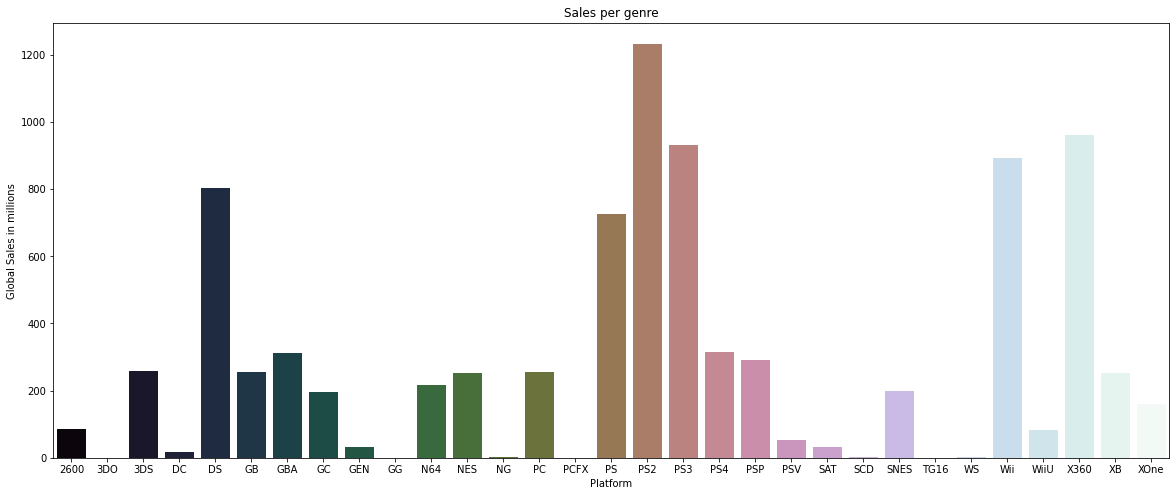

In [14]:
ax = sns.barplot(x=df_2.groupby(['Platform']).sum().index,
                    y=df_2.groupby(['Platform']).sum().Global_Sales,
                    palette='cubehelix')
ax.set(ylabel="Global Sales in millions", title="Sales per genre")
ax.figure.set_size_inches(20, 8)
plt.show()

Now we analize the games per genre

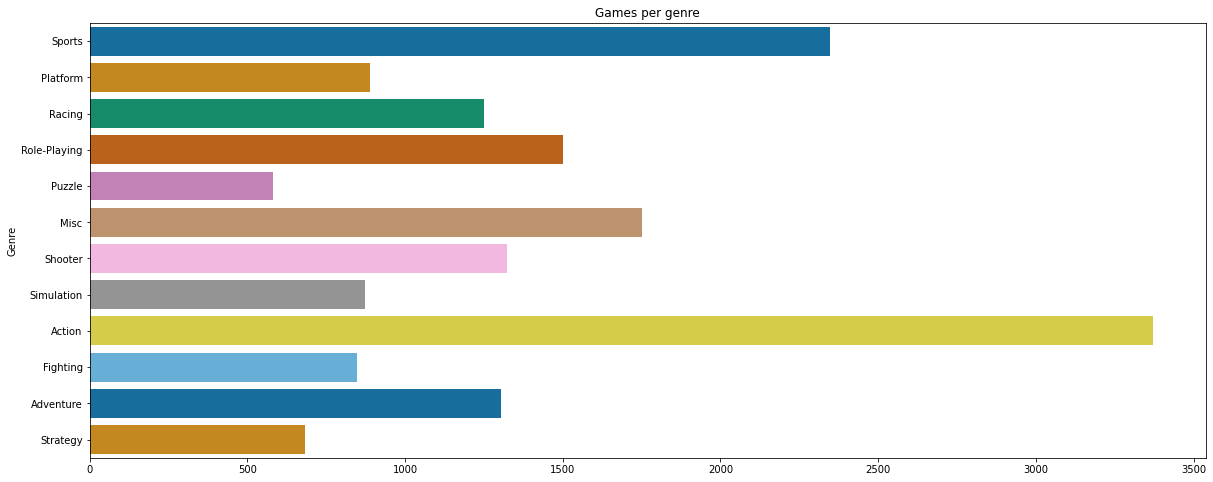

In [15]:
cnt(df['Genre'],
    'colorblind',
    'Genre',
    'Games per genre')

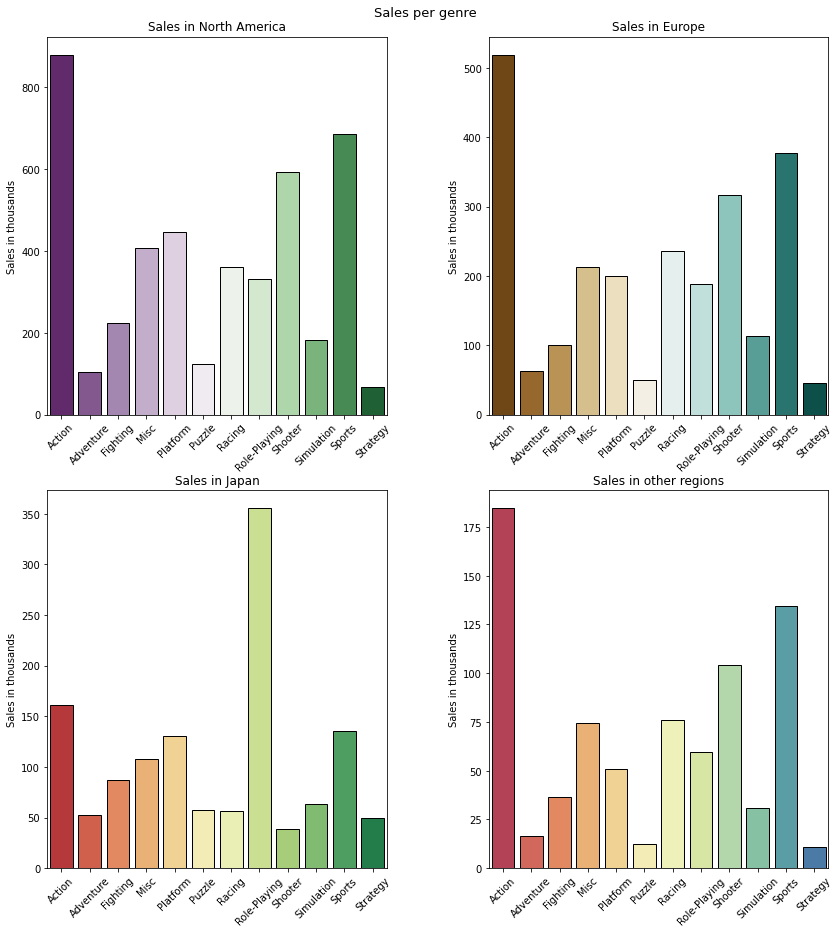

In [16]:

df_genre = df.groupby(['Genre']).sum()


fig = plt.figure(figsize=(14, 14))
title=fig.suptitle("Sales per genre", fontsize=13)
fig.subplots_adjust(top=0.95, wspace=0.3)

ax1 = fig.add_subplot(2,2, 1)
sns.barplot(x=df_genre.index,
                        y=df_genre['NA_Sales'],
                        palette='PRGn',
                        edgecolor='black', 
                        ax=ax1)
ax1.set(title="Sales in North America",
            ylabel="Sales in thousands",
            xlabel='')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)

ax2 = fig.add_subplot(2, 2 ,2)
sns.barplot(x=df_genre.index,
                        y=df_genre['EU_Sales'],
                        palette="BrBG",
                        edgecolor='black',
                        ax=ax2)
ax2.set(title="Sales in Europe",
            ylabel="Sales in thousands",
            xlabel='')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)

ax3 = fig.add_subplot(2,2,3)
sns.barplot(x=df_genre.index,
                y=df_genre['JP_Sales'],
                palette='RdYlGn',
                edgecolor='black',
                ax=ax3)
ax3.set(title="Sales in Japan",
            ylabel="Sales in thousands",
            xlabel='')
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=45)

ax4 = fig.add_subplot(2,2,4)
sns.barplot(x=df_genre.index,
                y=df_genre['Other_Sales'],
                palette='Spectral',
                edgecolor='black',
                ax=ax4)
ax4.set(title="Sales in other regions",
            ylabel='Sales in thousands',
            xlabel='')
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=45)
plt.show()

We can sum these 4 plots to get the global sales per genre

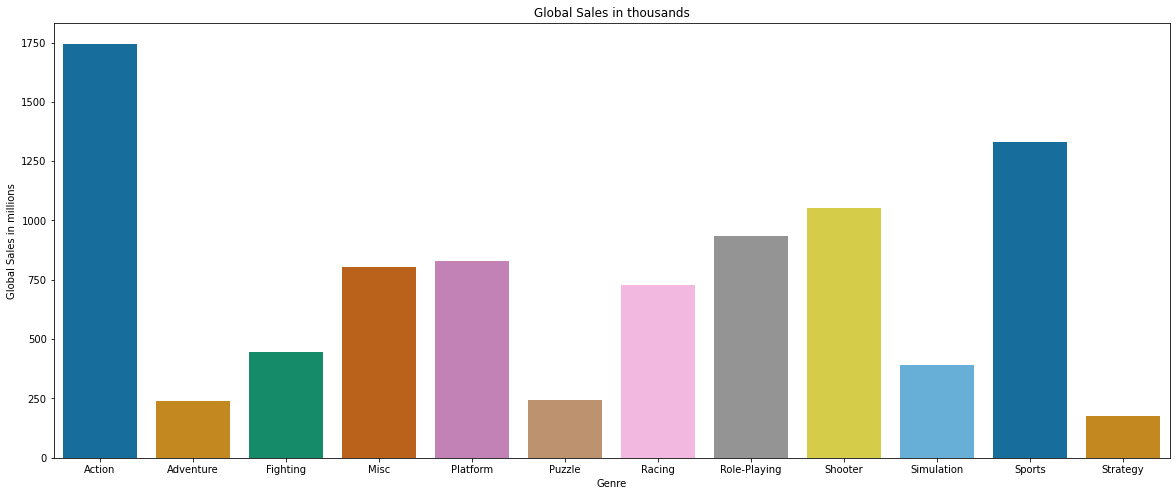

In [17]:
ax = sns.barplot(x=df.groupby(['Genre']).sum().index,
                    y=df.groupby(['Genre']).sum().Global_Sales,
                    palette='colorblind')
ax.set(ylabel="Global Sales in millions", title="Global Sales in thousands")
ax.figure.set_size_inches(20, 8)
plt.show()

Instead of number of sales per genre we can plot the percentage of sales per region in all of the genres

In [18]:
stcks = df.groupby(["Genre"])[["NA_Sales",          #Split the dataframe by Genre and then add all the sales per region
                        "EU_Sales",
                        "JP_Sales",
                        "Other_Sales"]].sum()

In [19]:
stcks['Total'] = stcks.T.sum()
stcks['NA_Sales'] = stcks['NA_Sales']/stcks['Total']
stcks['EU_Sales'] = stcks['EU_Sales']/stcks['Total']
stcks['JP_Sales'] = stcks['JP_Sales']/stcks['Total']
stcks['Other_Sales'] = stcks['Other_Sales']/stcks['Total']
stcks.drop('Total', axis=1, inplace=True)

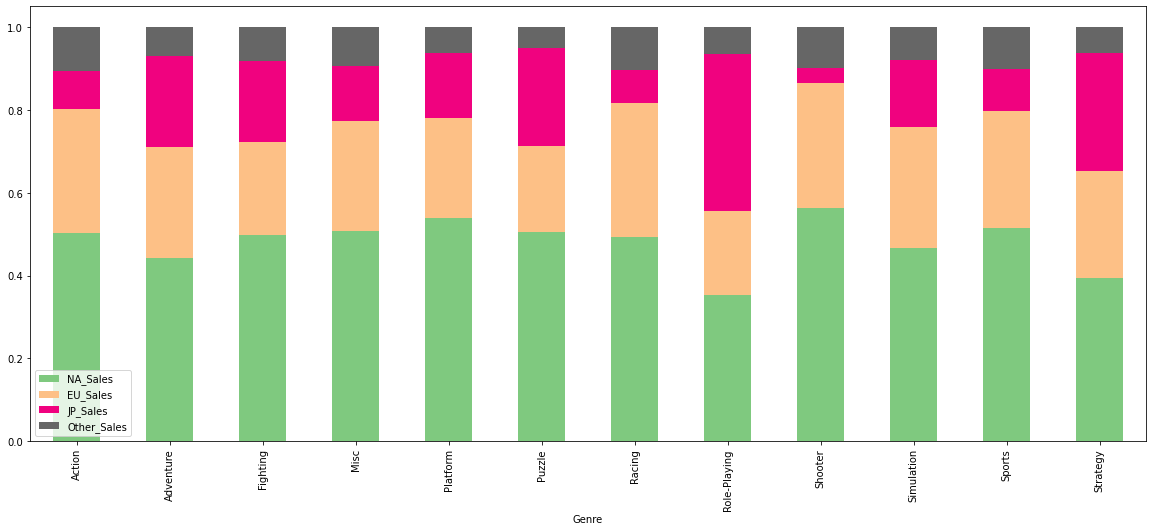

In [20]:
stcks.plot(kind='bar', stacked='True', figsize=(20,8), cmap="Accent")
plt.show()

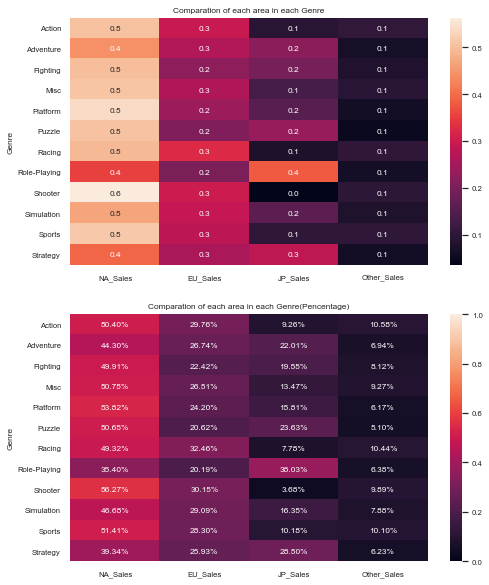

In [21]:
plt.figure(figsize=(8, 10))
sns.set(font_scale=0.7)
plt.subplot(211)
sns.heatmap(stcks.loc[:, 'NA_Sales':'Other_Sales'], annot=True, fmt = '.1f')
plt.title("Comparation of each area in each Genre")
plt.subplot(212)
sns.heatmap(stcks.loc[:,'NA_Sales':'Other_Sales'], vmax =1, vmin=0, annot=True, fmt = '.2%')
plt.title("Comparation of each area in each Genre(Pencentage)")
plt.show()

In [22]:
def histo(clm, lbl, clr, e_clr):
    ax = sns.distplot(df[clm], 
                        kde=False, 
                        bins=50,
                        axlabel=lbl,
                        hist_kws= {'color':clr, 
                                    'edgecolor':e_clr,
                                    'linewidth':3,
                                    'linestyle':'-',
                                    'alpha':0.9})
    ax.set_xticks(np.arange(0,100,2))
    ax.figure.set_size_inches(20,8)
    plt.show()

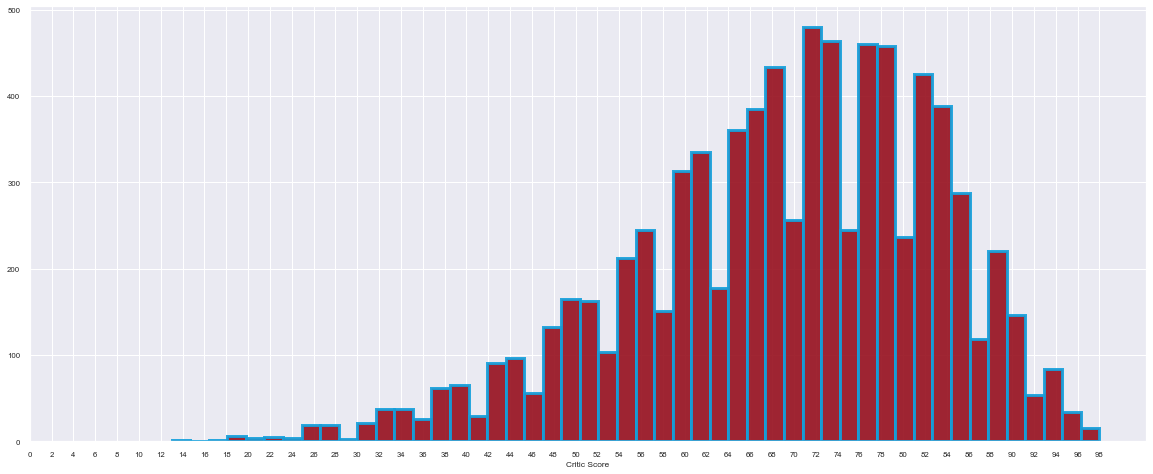

In [23]:
histo('Critic_Score', 'Critic Score', '#960e1d', '#14a0dc')

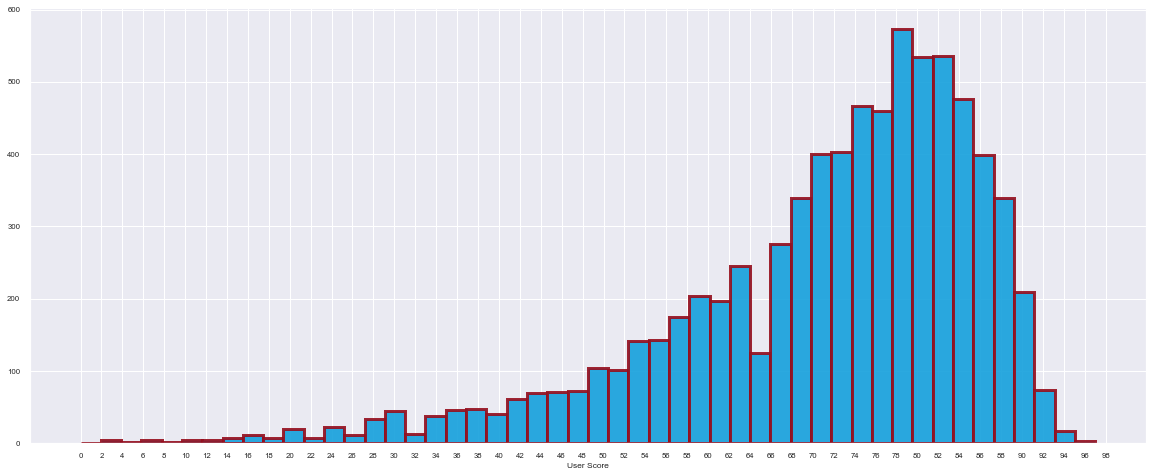

In [24]:
histo('User_Score', 'User Score', '#14a0dc', '#960e1d')

We can join these plots to plot the joint distribution of these two variables

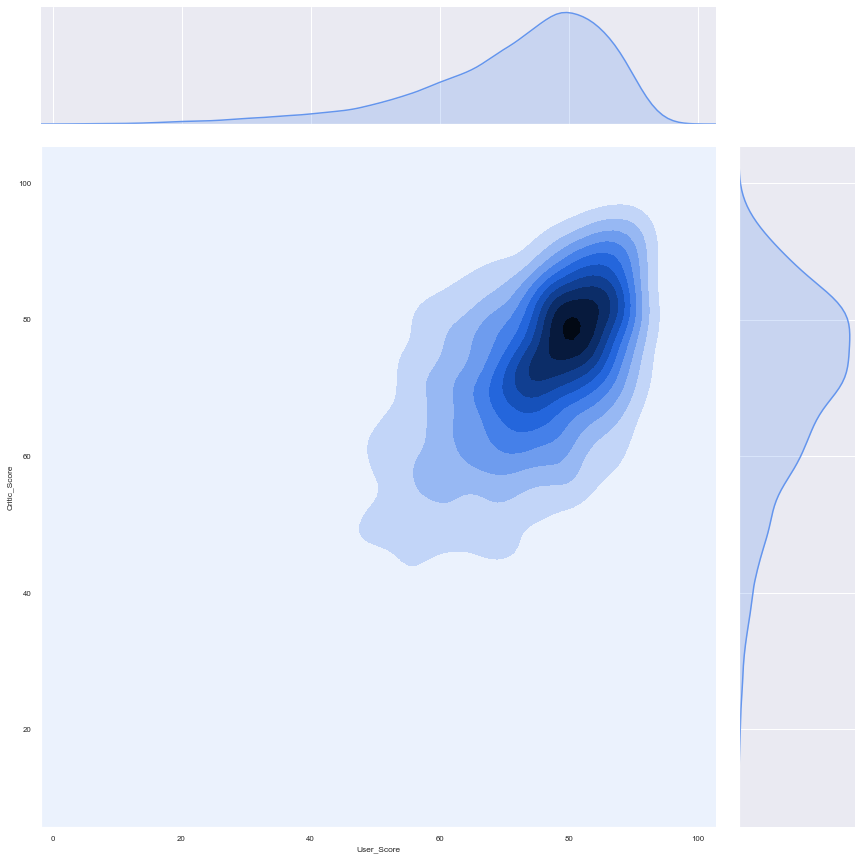

In [25]:
ax = sns.jointplot(x="User_Score",
                    y="Critic_Score",
                    data=df, 
                    kind="kde",
                    height=12,
                    color='cornflowerblue',
                    dropna=True)
plt.show()

In [26]:
def scatter(x, y, prctl):
    df_percent = df.sample(frac=prctl)
    ax = sns.scatterplot(x=df_percent["Critic_Score"], 
                            y=df_percent['Global_Sales'])
    ax.figure.set_size_inches(20, 8)
    plt.show()

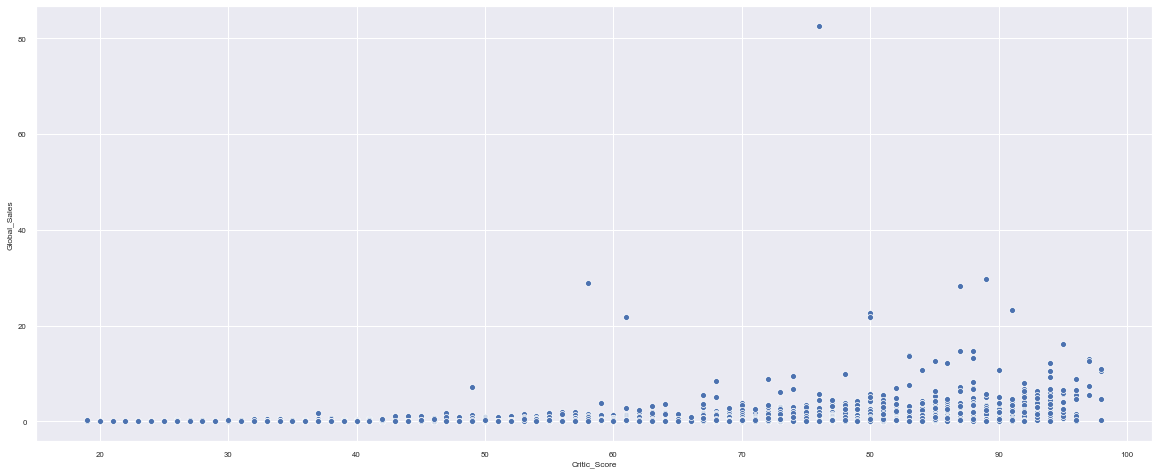

In [27]:
scatter(df['Critic_Score'], df['Global_Sales'], 0.5)

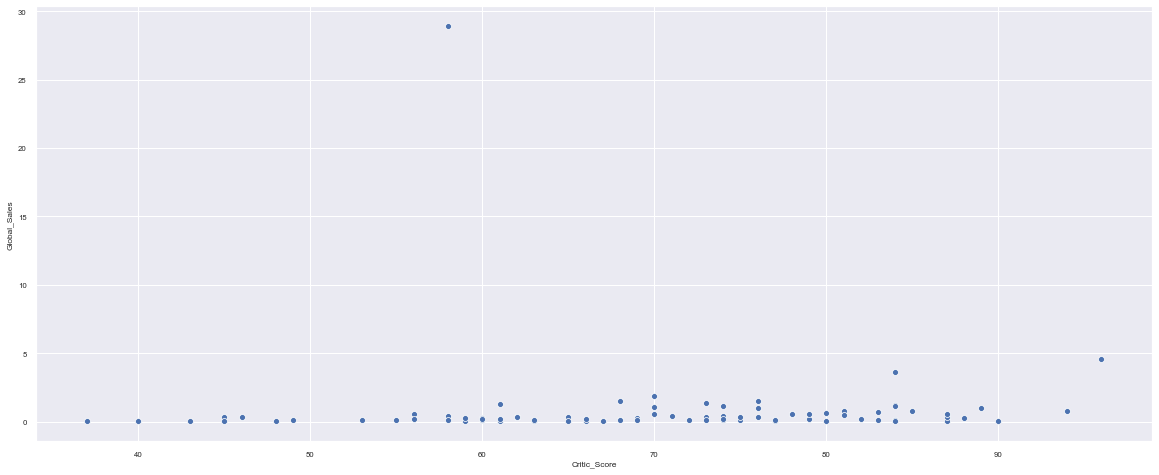

In [28]:
scatter(df['User_Score'], df['Global_Sales'], 0.01)

In [29]:
def sls(col):
    return df.sort_values(col, ascending=False)[["Name",
                                                "Year_of_Release",
                                                "Genre",
                                                "Platform",
                                                col]].head()

In [30]:
sls("Other_Sales")

,Name,Year_of_Release,Genre,Platform,Other_Sales
17,Grand Theft Auto: San Andreas,2004.0,Action,PS2,10.57
0,Wii Sports,2006.0,Sports,Wii,8.45
48,Gran Turismo 4,2004.0,Racing,PS2,7.53
16,Grand Theft Auto V,2013.0,Action,PS3,3.96
2,Mario Kart Wii,2008.0,Racing,Wii,3.29


Clearly Nintendo is king in Japan

In [31]:
sls("JP_Sales")

,Name,Year_of_Release,Genre,Platform,JP_Sales
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,GB,10.22
12,Pokemon Gold/Pokemon Silver,1999.0,Role-Playing,GB,7.20
1,Super Mario Bros.,1985.0,Platform,NES,6.81
6,New Super Mario Bros.,2006.0,Platform,DS,6.50
20,Pokemon Diamond/Pokemon Pearl,2006.0,Role-Playing,DS,6.04


In [32]:
sls("EU_Sales")

,Name,Year_of_Release,Genre,Platform,EU_Sales
0,Wii Sports,2006.0,Sports,Wii,28.96
2,Mario Kart Wii,2008.0,Racing,Wii,12.76
10,Nintendogs,2005.0,Simulation,DS,10.95
3,Wii Sports Resort,2009.0,Sports,Wii,10.93
19,Brain Age: Train Your Brain in Minutes a Day,2005.0,Misc,DS,9.20


In [33]:
sls("NA_Sales")

,Name,Year_of_Release,Genre,Platform,NA_Sales
0,Wii Sports,2006.0,Sports,Wii,41.36
1,Super Mario Bros.,1985.0,Platform,NES,29.08
9,Duck Hunt,1984.0,Shooter,NES,26.93
5,Tetris,1989.0,Puzzle,GB,23.20
2,Mario Kart Wii,2008.0,Racing,Wii,15.68


In [34]:
sls("Global_Sales")

,Name,Year_of_Release,Genre,Platform,Global_Sales
0,Wii Sports,2006.0,Sports,Wii,82.53
1,Super Mario Bros.,1985.0,Platform,NES,40.24
2,Mario Kart Wii,2008.0,Racing,Wii,35.52
3,Wii Sports Resort,2009.0,Sports,Wii,32.77
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,GB,31.37


In [35]:
companies = {"PS2":"Sony", "DS":"Nintendo", "PS3":"Sony", "Wii":"Nintendo",
            "X360":"Microsoft", "PSP":"Sony", "PS":"Sony", "PC":"Other",
            "XB":"Microsoft", "GBA":"Nintendo", "GC":"Nintendo", "3DS":"Nintendo",
            "PSV":"Sony", "PS4":"Sony", "N64":"Nintendo", "XOne":"Microsoft",
            "SNES":"Nintendo", "SAT":"Sega", "WiiU":"Nintendo", "2600":"Atari",
            "GB":"Nintendo", "NES":"Nintendo", "DC":"Sega", "GEN":"Sega", "NG":"SNK",
            "SCD":"Nintendo", "WS":"Koto", "3DO":"3DO", "TG16":"NEC", "PCFX":"NEC", 
            "GG":"Sega"}

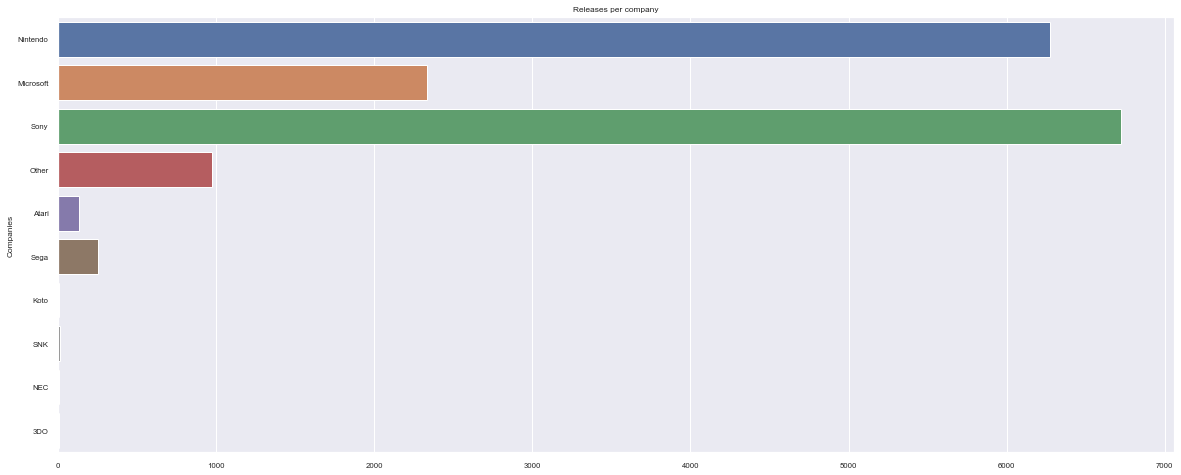

In [36]:
df['Companies'] = df['Platform'].map(companies)
cnt(df['Companies'],
    'deep',
    'Companies',
    'Releases per company')

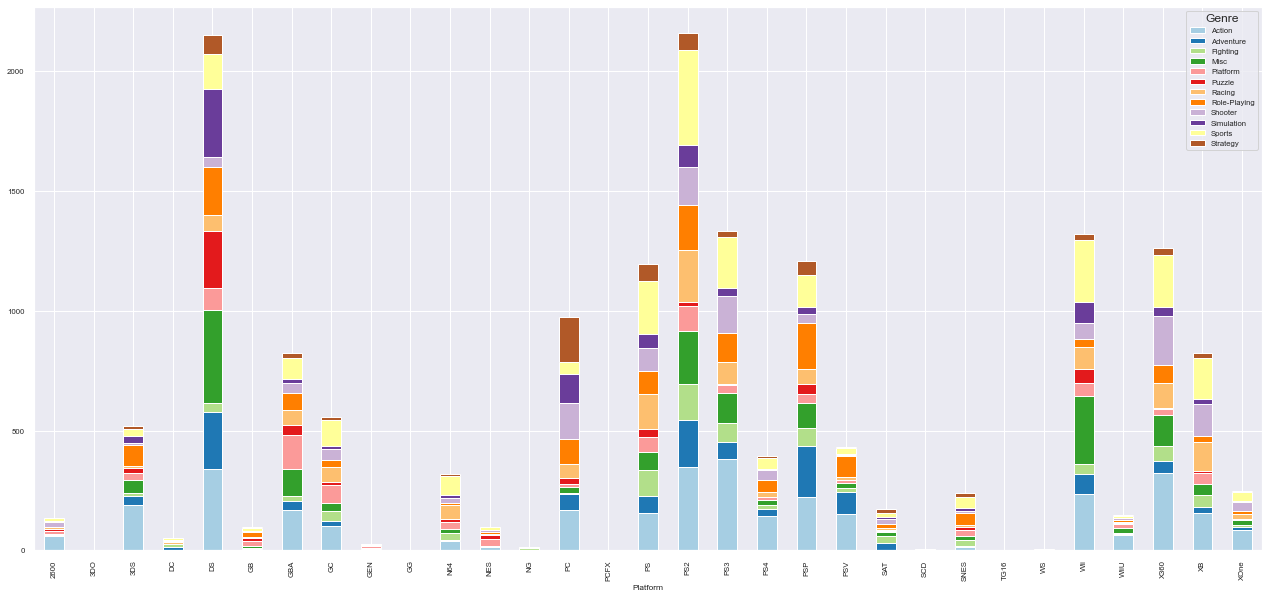

In [37]:
df_plot = df.groupby(['Platform', 'Genre']).size().reset_index().pivot(columns='Genre', index='Platform', values=0)
ax = df_plot.plot(kind='bar', stacked=True, cmap="Paired")
ax.figure.set_size_inches(22,10)
plt.show()

In [38]:
def snlss(col, pal):
    ax = sns.countplot(x=df[col],
                        order=df[col].value_counts().iloc[:10].index,
                        palette=pal)
    ax.set(ylabel="Number of games", 
            title="Number of games per {}".format(col))
    ax.figure.set_size_inches(20, 8)
    plt.show()

In [39]:
def sales(col,pal, region, size):
    ax = sns.barplot(x=df.groupby([col]).sum().index,
                        y=df.groupby([col]).sum()[region],
                        order=df[col].value_counts().iloc[:10].index,
                        palette=pal,
                        edgecolor='black')
    ax.set(title='Sales per {}'.format(col),
            ylabel='Global Sales in thousands')
    ax.figure.set_size_inches(size)
    plt.show()

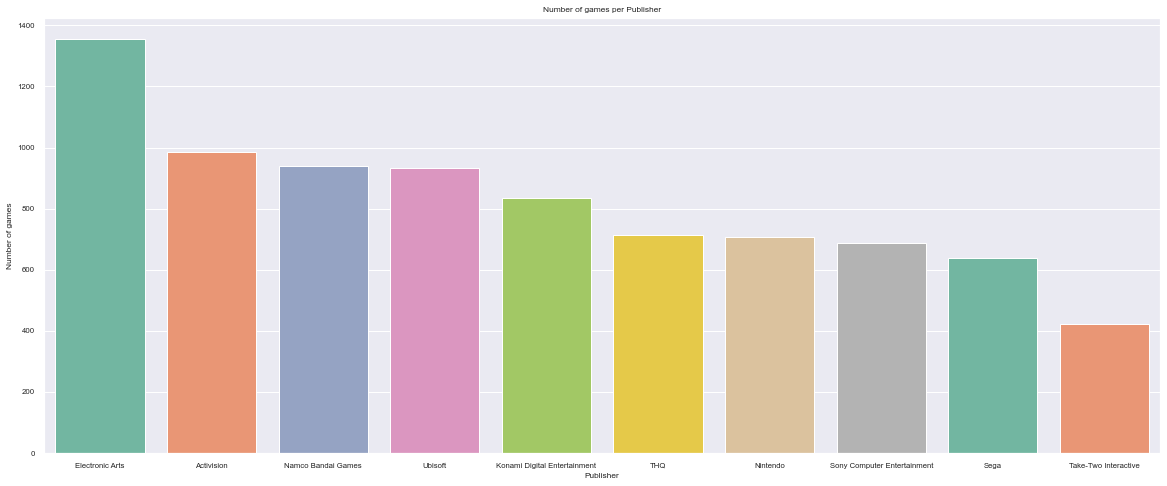

In [40]:
snlss('Publisher', 'Set2')

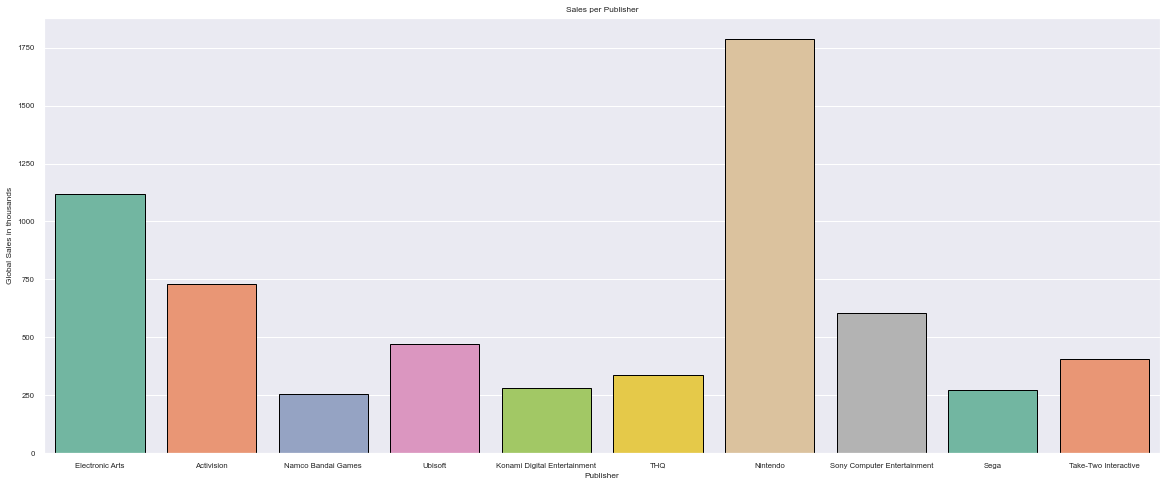

In [41]:
sales('Publisher', 'Set2', 'Global_Sales', (20, 8))

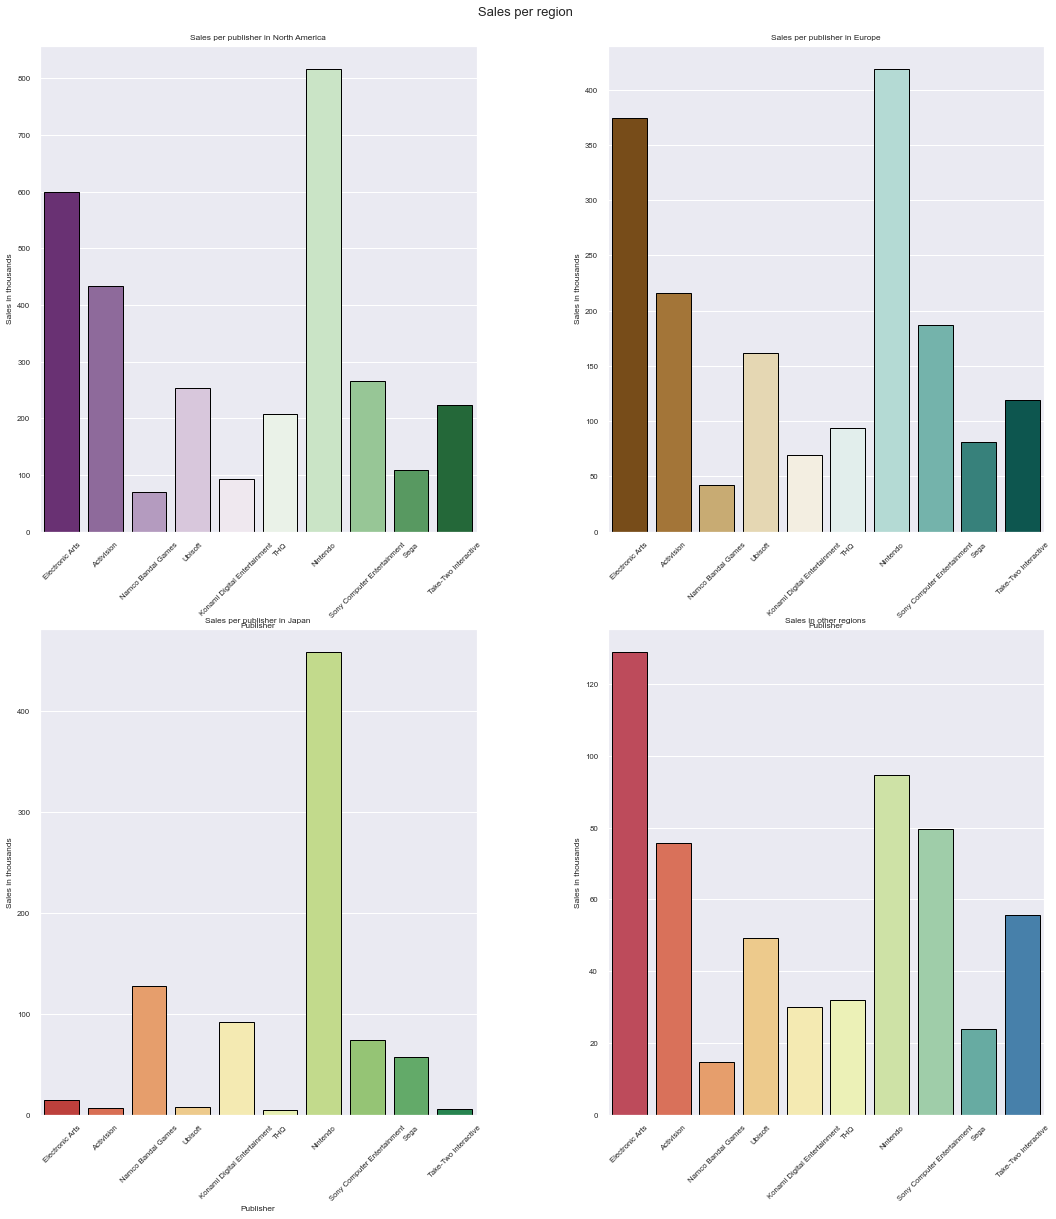

In [42]:
fig = plt.figure(figsize=(18, 18))
title=fig.suptitle("Sales per region", fontsize=13)
fig.subplots_adjust(top=0.95, wspace=0.3)
fig.tight_layout()

ax1 = fig.add_subplot(2,2, 1)
sns.barplot(x=df.groupby(['Publisher']).sum().index,
            y=df.groupby(['Publisher']).sum()['NA_Sales'],
            order=df['Publisher'].value_counts().iloc[:10].index,
            palette='PRGn',
            edgecolor='black', 
            ax=ax1)
ax1.set(title="Sales per publisher in North America",
            ylabel="Sales in thousands")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)

ax2 = fig.add_subplot(2, 2 ,2)
sns.barplot(x=df.groupby(['Publisher']).sum().index,
            y=df.groupby(['Publisher']).sum()['EU_Sales'],
            order=df['Publisher'].value_counts().iloc[:10].index,
            palette="BrBG",
            edgecolor='black',
            ax=ax2)
ax2.set(title="Sales per publisher in Europe",
            ylabel="Sales in thousands")
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)

ax3 = fig.add_subplot(2,2,3)
sns.barplot(x=df.groupby(['Publisher']).sum().index,               
            y=df.groupby(['Publisher']).sum()['JP_Sales'],
            order=df['Publisher'].value_counts().iloc[:10].index,
            palette='RdYlGn',
            edgecolor='black',
            ax=ax3)
ax3.set(title="Sales per publisher in Japan",
            ylabel="Sales in thousands")
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=45)

ax4 = fig.add_subplot(2,2,4)
sns.barplot(x=df.groupby(['Publisher']).sum().index,
            y=df.groupby(['Publisher']).sum()['Other_Sales'],
            order=df['Publisher'].value_counts().iloc[:10].index,
            palette='Spectral',
            edgecolor='black',                ax=ax4)
ax4.set(title="Sales in other regions",
            ylabel='Sales in thousands',
            xlabel='')
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=45)
plt.show()

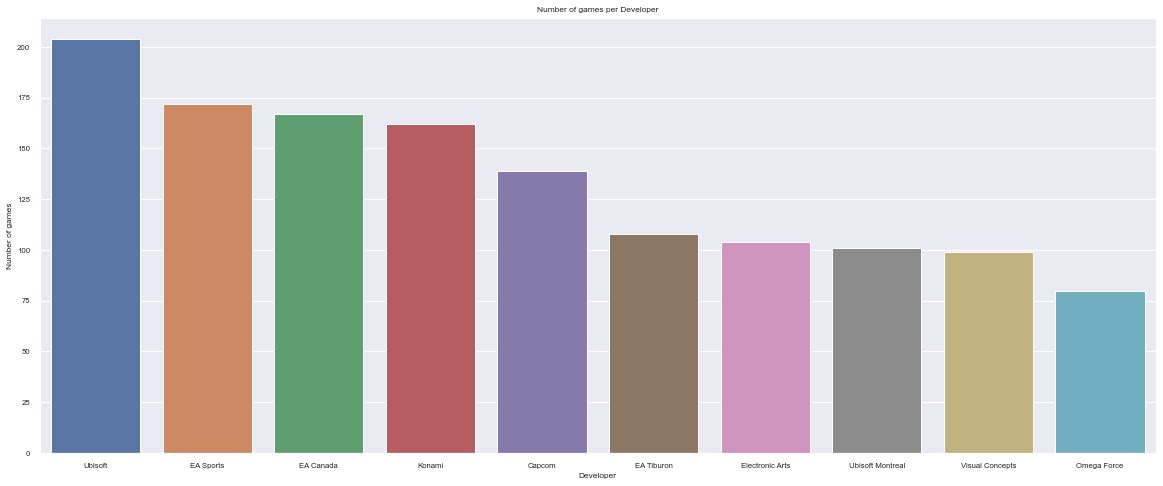

In [43]:
snlss('Developer', 'deep')

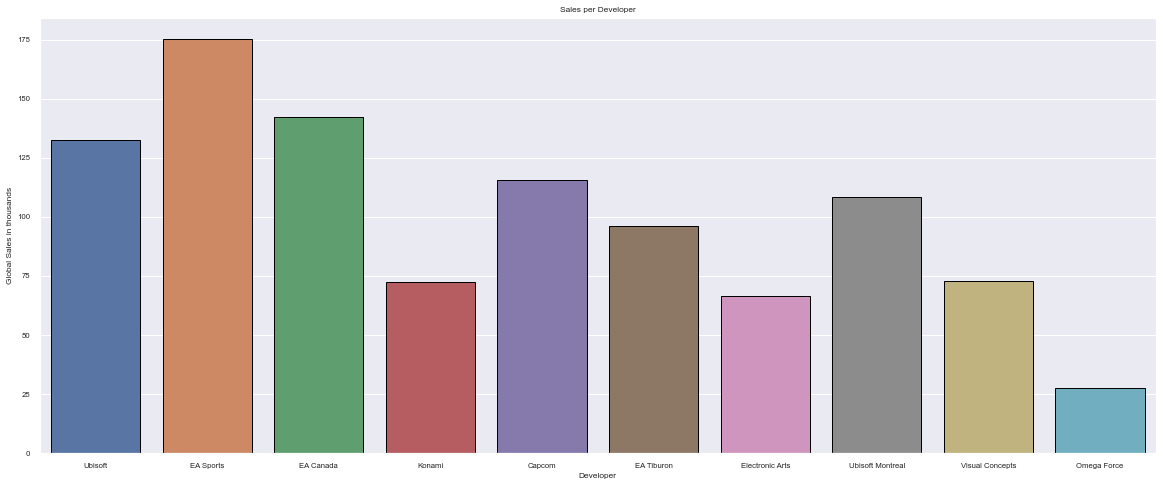

In [44]:
sales('Developer', 'deep', 'Global_Sales', (20, 8))

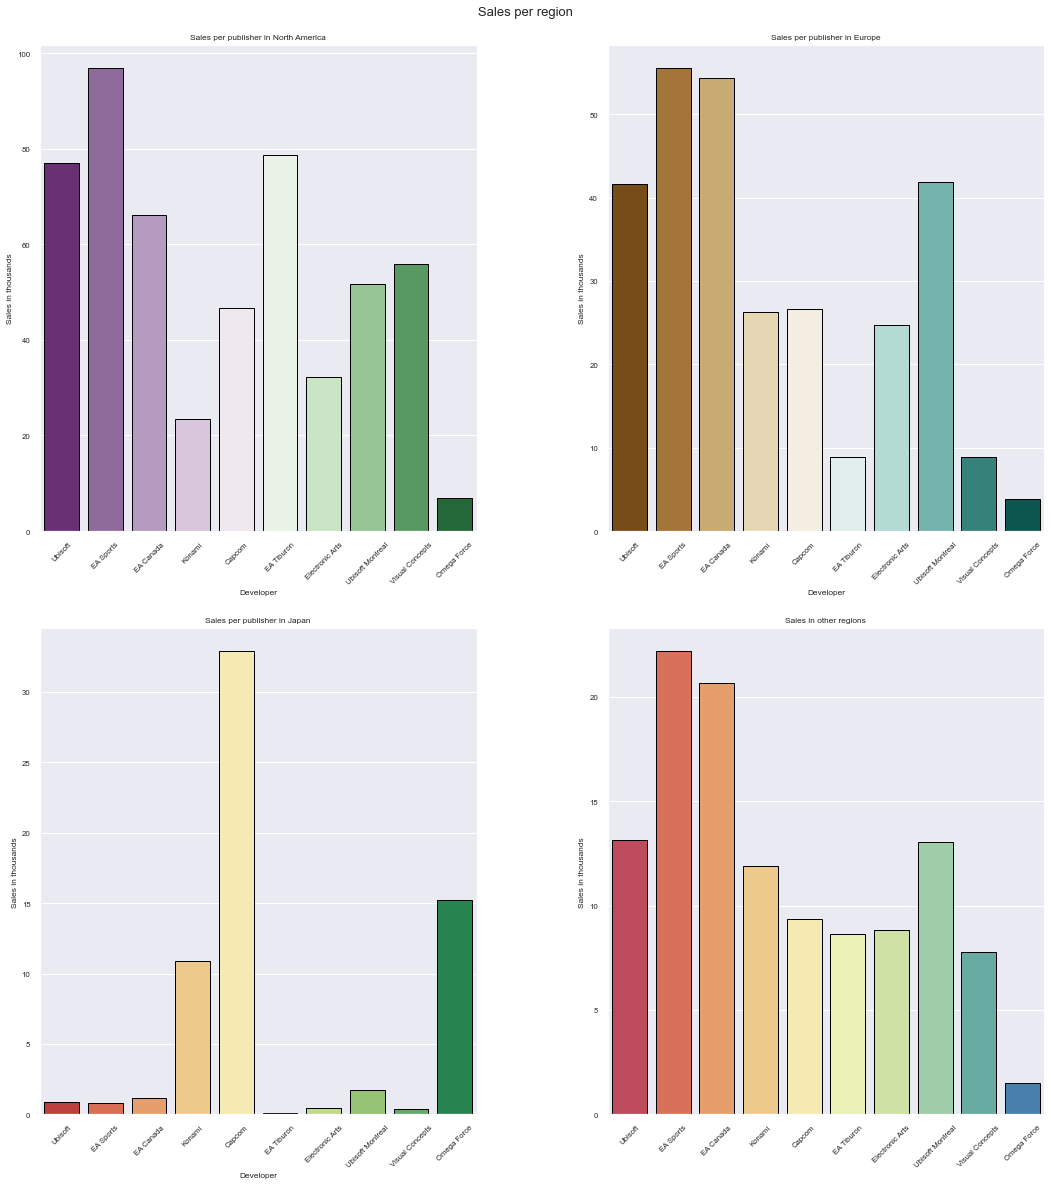

In [45]:
fig = plt.figure(figsize=(18, 18))
title=fig.suptitle("Sales per region", fontsize=13)
fig.subplots_adjust(top=0.95, wspace=0.3)
fig.tight_layout()

ax1 = fig.add_subplot(2,2, 1)
sns.barplot(x=df.groupby(['Developer']).sum().index,
            y=df.groupby(['Developer']).sum()['NA_Sales'],
            order=df['Developer'].value_counts().iloc[:10].index,
            palette='PRGn',
            edgecolor='black', 
            ax=ax1)
ax1.set(title="Sales per publisher in North America",
            ylabel="Sales in thousands")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)

ax2 = fig.add_subplot(2, 2 ,2)
sns.barplot(x=df.groupby(['Developer']).sum().index,
            y=df.groupby(['Developer']).sum()['EU_Sales'],
            order=df['Developer'].value_counts().iloc[:10].index,
            palette="BrBG",
            edgecolor='black',
            ax=ax2)
ax2.set(title="Sales per publisher in Europe",
            ylabel="Sales in thousands")
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)

ax3 = fig.add_subplot(2,2,3)
sns.barplot(x=df.groupby(['Developer']).sum().index,
            y=df.groupby(['Developer']).sum()['JP_Sales'],
            order=df['Developer'].value_counts().iloc[:10].index,
            palette='RdYlGn',
            edgecolor='black',
            ax=ax3)
ax3.set(title="Sales per publisher in Japan",
            ylabel="Sales in thousands")
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=45)

ax4 = fig.add_subplot(2,2,4)
sns.barplot(x=df.groupby(['Developer']).sum().index,
            y=df.groupby(['Developer']).sum()['Other_Sales'],
            order=df['Developer'].value_counts().iloc[:10].index,
            palette='Spectral',
            edgecolor='black',  ax=ax4)
ax4.set(title="Sales in other regions",
            ylabel='Sales in thousands',
            xlabel='')
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=45)
plt.show()

Now we'll try to predict the sales of a game


We begin by dropping the Name column

We begin by searching the column that is most correlated to Global Sales and then do linear regression with the two features.

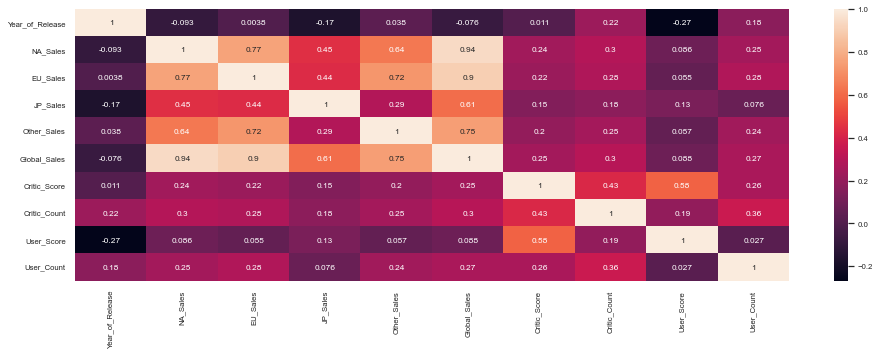

In [46]:
ax = sns.heatmap(df.corr(), annot=True)
ax.figure.set_size_inches(16, 5)
plt.show()

In [47]:
X = df.drop(['Name'], axis=1)             #drop the column

In [48]:
X.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Companies
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E,Nintendo
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,Nintendo
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E,Nintendo
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E,Nintendo
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,Nintendo


In [49]:
df_example = df[['Global_Sales', 'User_Score']].dropna()
X_example = df_example['User_Score']
y_example = df_example['Global_Sales']
X_example=np.array(X_example).reshape(-1 , 1)
y_example=np.array(y_example).reshape(-1 , 1)

X_example_train, X_example_test, y_example_train, y_example_test = train_test_split(X_example, y_example, test_size= 0.25, random_state=1)

In [50]:
lm = LinearRegression()
lm.fit(X_example_train, y_example_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
lm.intercept_, lm.coef_

(array([-0.01387452]), array([[0.01074543]]))

In [52]:
lm.score(X_example_train, y_example_train)

0.006638280560039234

In [53]:
lm_pred = lm.predict(X_example_test)


In [54]:
print('Coefficient of determination: %.2f'
      % r2_score(y_example_test, lm_pred))

Coefficient of determination: 0.01


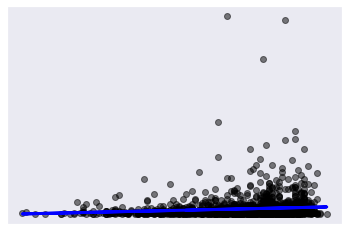

In [55]:
plt.scatter(X_example_test, y_example_test,  color='black', alpha=0.5)
plt.plot(X_example_test, lm_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [56]:
X2 = sm.add_constant(X_example_train)
est = sm.OLS(y_example_train, X2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     38.02
Date:                Sat, 01 Aug 2020   Prob (F-statistic):           7.47e-10
Time:                        19:01:06   Log-Likelihood:                -11914.
No. Observations:                5692   AIC:                         2.383e+04
Df Residuals:                    5690   BIC:                         2.384e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0139      0.127     -0.109      0.913      -0.263       0.235
x1             0.0107      0.002      6.166      0.000       0.007       0.014
==============================================================================
Omnibus:                    11943.288   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         81040883.017
Skew:                          17.713   Prob(JB):                         0.00
Kurtosis:                     586.480   Cond. No.                         356.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
lm_mse = mean_squared_error(y_example_test, lm_pred)
lm_mse 

2.4105570165752206

In [59]:
q3, q1 = np.percentile(df['Global_Sales'], [25,75])
q3,q1

(0.06, 0.47)

2.7 millions is a big error, let's try more complex methods and let's find out if we can do better. 

Doen't make sense to predict Global Sales with the region's sales, just add them up and get an almost perfect model.

In [60]:
X.drop(['NA_Sales', 
        'EU_Sales',
        'JP_Sales',
        'Other_Sales',
        'Companies'], 
        axis=1,
        inplace=True)
X.head()

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,82.53,76.0,51.0,80.0,322.0,Nintendo,E
1,NES,1985.0,Platform,Nintendo,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Wii,2008.0,Racing,Nintendo,35.52,82.0,73.0,83.0,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,32.77,80.0,73.0,80.0,192.0,Nintendo,E
4,GB,1996.0,Role-Playing,Nintendo,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
X.dropna(inplace=True)
X.shape

(6825, 11)

In [62]:
y=X['Global_Sales']
X.drop(['Global_Sales'], inplace=True, axis=1)

In [63]:
X.head()

,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,76.0,51.0,80.0,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,82.0,73.0,83.0,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,80.0,73.0,80.0,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,89.0,65.0,85.0,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,58.0,41.0,66.0,129.0,Nintendo,E


In [64]:
X_num = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
X_cat = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']
X_ord = ['Year_of_Release']

In [65]:
pipeline = ColumnTransformer([
    ('num', StandardScaler(), X_num),
    ('ord', OrdinalEncoder(), X_ord),
    ('cat', OneHotEncoder(), X_cat)
])

X_prep = pipeline.fit_transform(X)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.2, random_state=1)

In [72]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
lm.score(X_train, y_train)

0.42877742498695204

In [77]:
lm_pred = lm.predict(X_test)
lm_mse = mean_squared_error(y_test, lm_pred)
lm_mse 

1.53678187296059

1.5 million is a lot less than 2.4 million. Let's try a non linear model.

In [104]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_example_train)

In [105]:
poly.fit(X_example_train, y_example_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [106]:
lm = LinearRegression()

lm.fit(X_poly, y_example_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
y_pred = lm.predict(poly.fit_transform(X_example_test))
lm_mse = mean_squared_error(y_example_test, y_pred)
lm_mse 

2.4068660955226195